In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

# Preprocessing

In [7]:
# 1 show img is black and white
# divide on 255 for normalized data

x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32')/255
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32')/255

x_train.shape

(60000, 28, 28, 1)

# Model Definition

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1) ))
# AvaragePooling2D
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu' ))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu' ))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))


/Users/taktakro/Desktop/MLProjects/venv3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary(
    
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,450 (240.04 KB)

 Trainable params: 61,450 (240.04 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9458 - loss: 0.1778 - val_accuracy: 0.9463 - val_loss: 0.1572
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9487 - loss: 0.1694 - val_accuracy: 0.9534 - val_loss: 0.1458
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9518 - loss: 0.1573 - val_accuracy: 0.9528 - val_loss: 0.1449
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9531 - loss: 0.1516 - val_accuracy: 0.9567 - val_loss: 0.1329
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9572 - loss: 0.1390 - val_accuracy: 0.9587 - val_loss: 0.1261
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9593 - loss: 0.1325 - val_accuracy: 0.9529 - val_loss: 0.1437
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9602 - loss: 0.1274 - val_accuracy: 0.9581 - val_loss: 0.1293
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9628 - loss: 0.1234 - val_accu

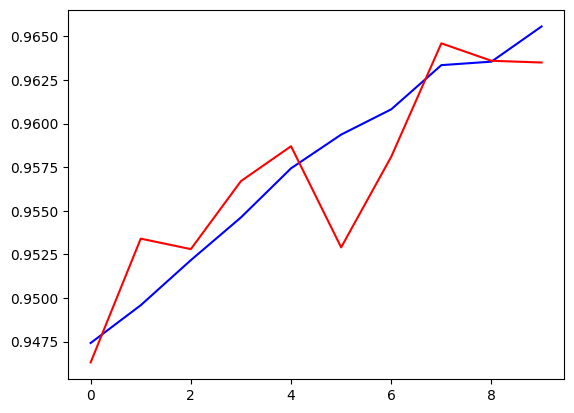

In [22]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], color='blue')
plt.plot(hist.history['val_accuracy'], color='red')